In [1]:
# Importing Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor,gradient_boosting
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.cluster import DBSCAN,k_means
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso,LassoCV,LinearRegression,Ridge,RidgeCV
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV,KFold,ParameterGrid,train_test_split
#from sklearn.neighbors import kd_tree,KDTree,KNeighborsClassifier
from sklearn.metrics import accuracy_score,auc,classification_report,confusion_matrix,euclidean_distances,euclidean_distances,f1_score
from sklearn.metrics import plot_roc_curve
from  sklearn.pipeline import Pipeline
from sklearn.svm import SVR,SVR
from sklearn.preprocessing import OneHotEncoder,power_transform,StandardScaler
from statsmodels.stats import anova,outliers_influence
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
df=pd.read_csv(r'D:\Datatrained\Practice Project Data Trained\Loan Application Status Prediction\loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# checking dimentionality
df.shape

# column rows 614,rows 13

(614, 13)

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
#Continueous Feature
#ApplicantIncome,CoapplicantIncome,LoanAmount,

#Categorical value
#Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_ID,Loan_Status

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
#Features types

#Categorical 

'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education','Self_Employed','Loan_Amount_Term', 'Credit_History', 
'Property_Area', 'Loan_Status'
        
#Continueous 

'ApplicantIncome','CoapplicantIncome','LoanAmount'

('ApplicantIncome', 'CoapplicantIncome', 'LoanAmount')

In [9]:
#Cheking null value

df.apply(lambda x: sum(x.isnull()))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
#Loan_ID,Education,ApplicantIncome,CoapplicantIncome,Property_Area and Loan_Status have no null value

In [11]:
# Lets look on number of unique value for each of categorical variable
df.apply(lambda x: len(x.unique()))

Loan_ID              614
Gender                 3
Married                3
Dependents             5
Education              2
Self_Employed          3
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

In [12]:
#ApplicantIncome,CoapplicantIncome,LoanAmount are continueous features

In [13]:
# Statistical Analysis
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [14]:
# Standard deviation is high for ApplicantIncome,CoapplicantIncome
# huge gap between min and map for ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
# zero min value for CoapplicantIncome & Credit_History


<AxesSubplot:xlabel='Gender', ylabel='count'>

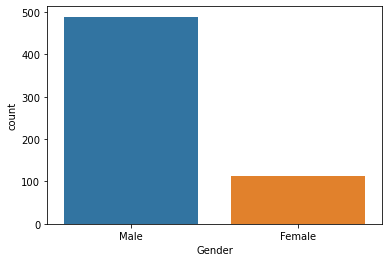

In [15]:
#Analysis of features
sns.countplot(x='Gender',data=df)

In [16]:
# Male applicants are in majority

<AxesSubplot:xlabel='Married', ylabel='count'>

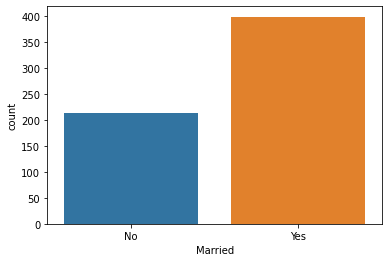

In [17]:
sns.countplot(x='Married',data=df)

In [18]:
# Married applicats are majority

<AxesSubplot:xlabel='Dependents', ylabel='count'>

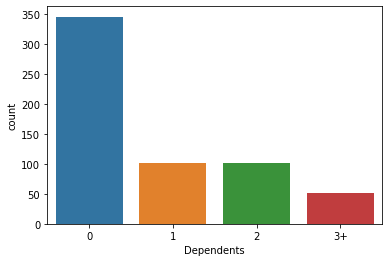

In [19]:
sns.countplot(x='Dependents',data=df)

In [20]:
# Most of accounts holder do not have dependents

<AxesSubplot:xlabel='Education', ylabel='count'>

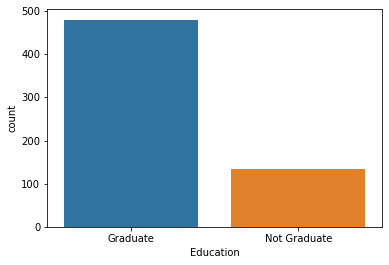

In [21]:
sns.countplot(x='Education',data=df)

In [22]:
# Educated loan applicats are in majority

In [23]:
df.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

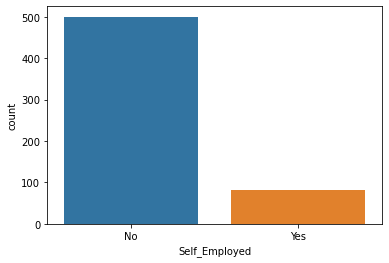

In [24]:
sns.countplot(x='Self_Employed',data=df)

In [25]:
#Self_Employed  applicats are not in majority

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

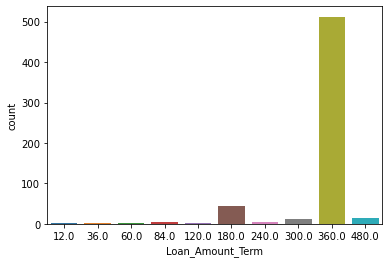

In [26]:
sns.countplot(x='Loan_Amount_Term',data=df)

In [27]:
# Loan_Amount_Term is maximun for 36 months 

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

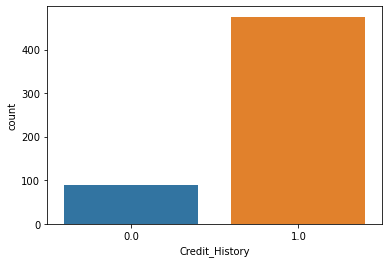

In [28]:
sns.countplot(x='Credit_History',data=df)

In [29]:
#Credit_History is 1 for majority accounts

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

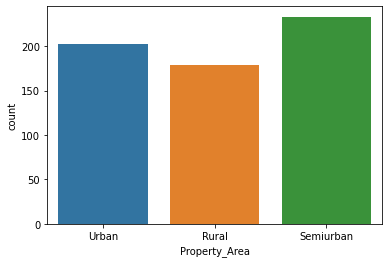

In [30]:
sns.countplot(x='Property_Area',data=df)

In [31]:
# Urban and semiurban applicants are in majority

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

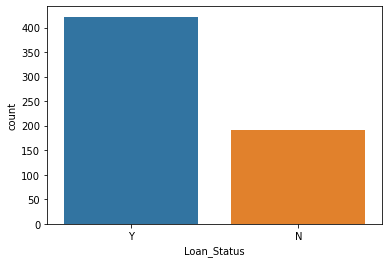

In [32]:
sns.countplot(x='Loan_Status',data=df)

In [33]:
#  applicants whose Loan_Status is y is in majority

In [34]:
# Multivariate Analysis
# checking correlation

corr_mat=df.corr() 
corr_mat

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


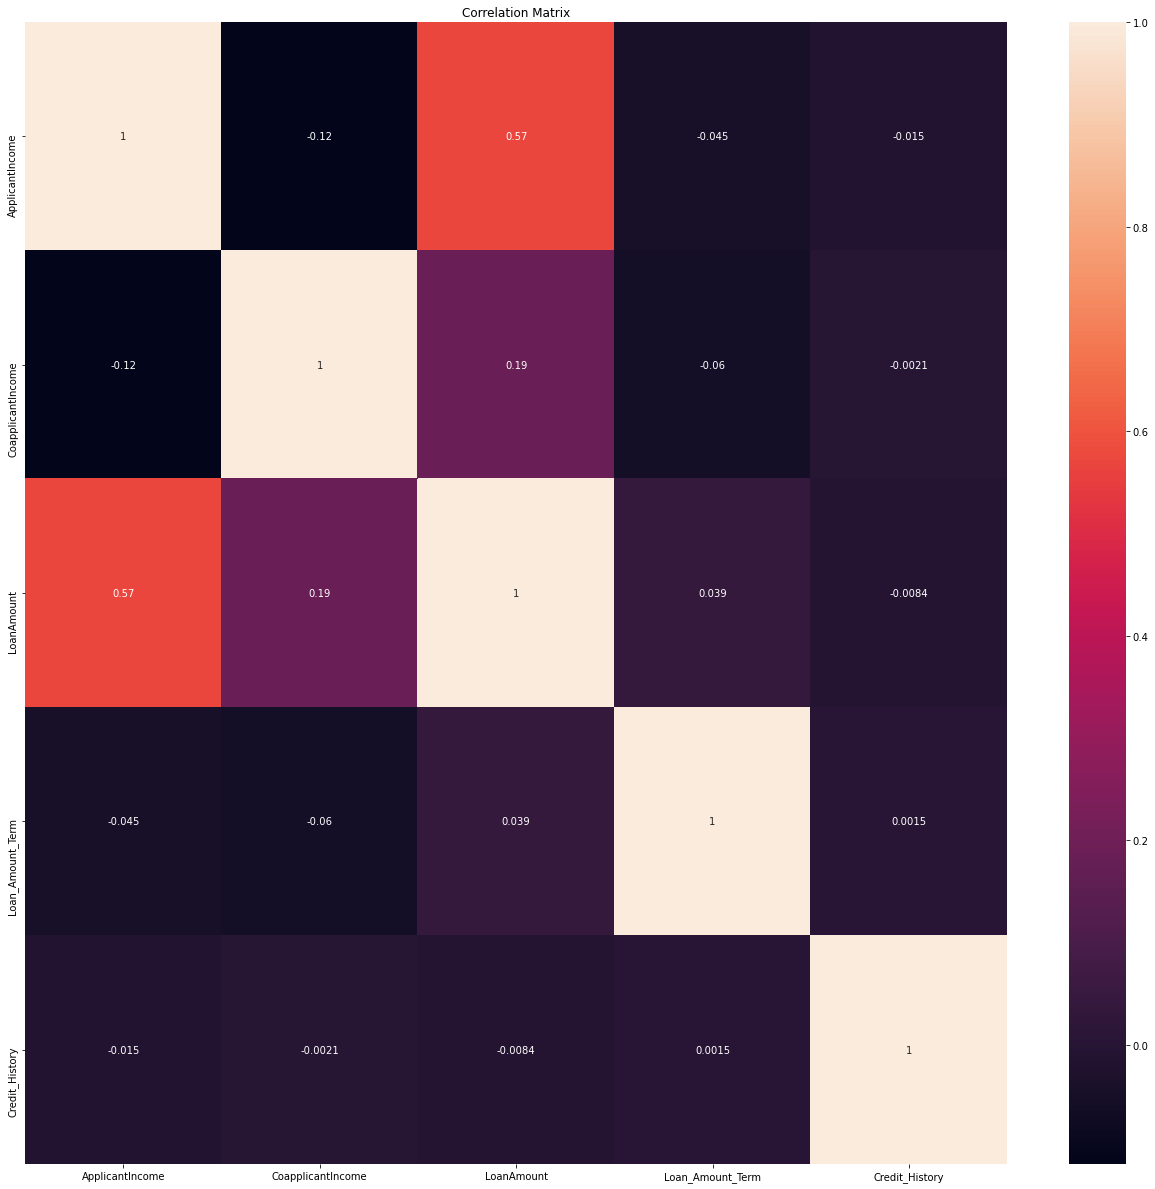

In [35]:
# It is difficut to analyse each feature co-relation in tabular form,lets convert into heat map plot
plt.figure(figsize= [22,21])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [36]:
#No two fetaures are strongly co related

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [48]:
# Treatining nan values in features

df['Credit_History']=df['Credit_History'].replace(np.nan,df['Credit_History'].mode()[0])
df['Dependents']=df['Dependents'].replace(np.nan,df['Dependents'].mode()[0])
df['Married']=df['Married'].replace(np.nan,df['Married'].mode()[0])
df['Gender']=df['Gender'].replace(np.nan,df['Gender'].mode()[0])
df['Self_Employed']=df['Self_Employed'].replace(np.nan,df['Self_Employed'].mode()[0])
df['LoanAmount']=df['LoanAmount'].replace(np.nan,df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].replace(np.nan,df['Loan_Amount_Term'].mode()[0])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    float64
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [ ]:
# all nan values removed

In [38]:
df_visualization_nominal=df[['Gender', 'Loan_ID', 'Married', 'Dependents','Education', 'Self_Employed', 'Property_Area',
       'Loan_Status']].copy()

In [39]:
df_visualization_nominal.columns

Index(['Gender', 'Loan_ID', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
#Checking the distribution of the continueous value of the float type column

In [40]:
df_visualization_continueous=df[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]].copy()

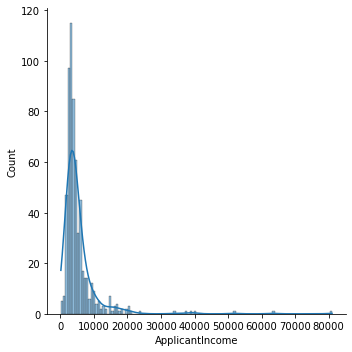

In [41]:
import seaborn as sns
sns.displot(df_visualization_continueous['ApplicantIncome'],kde=True)

In [ ]:
# Checking distribution of continueous variable

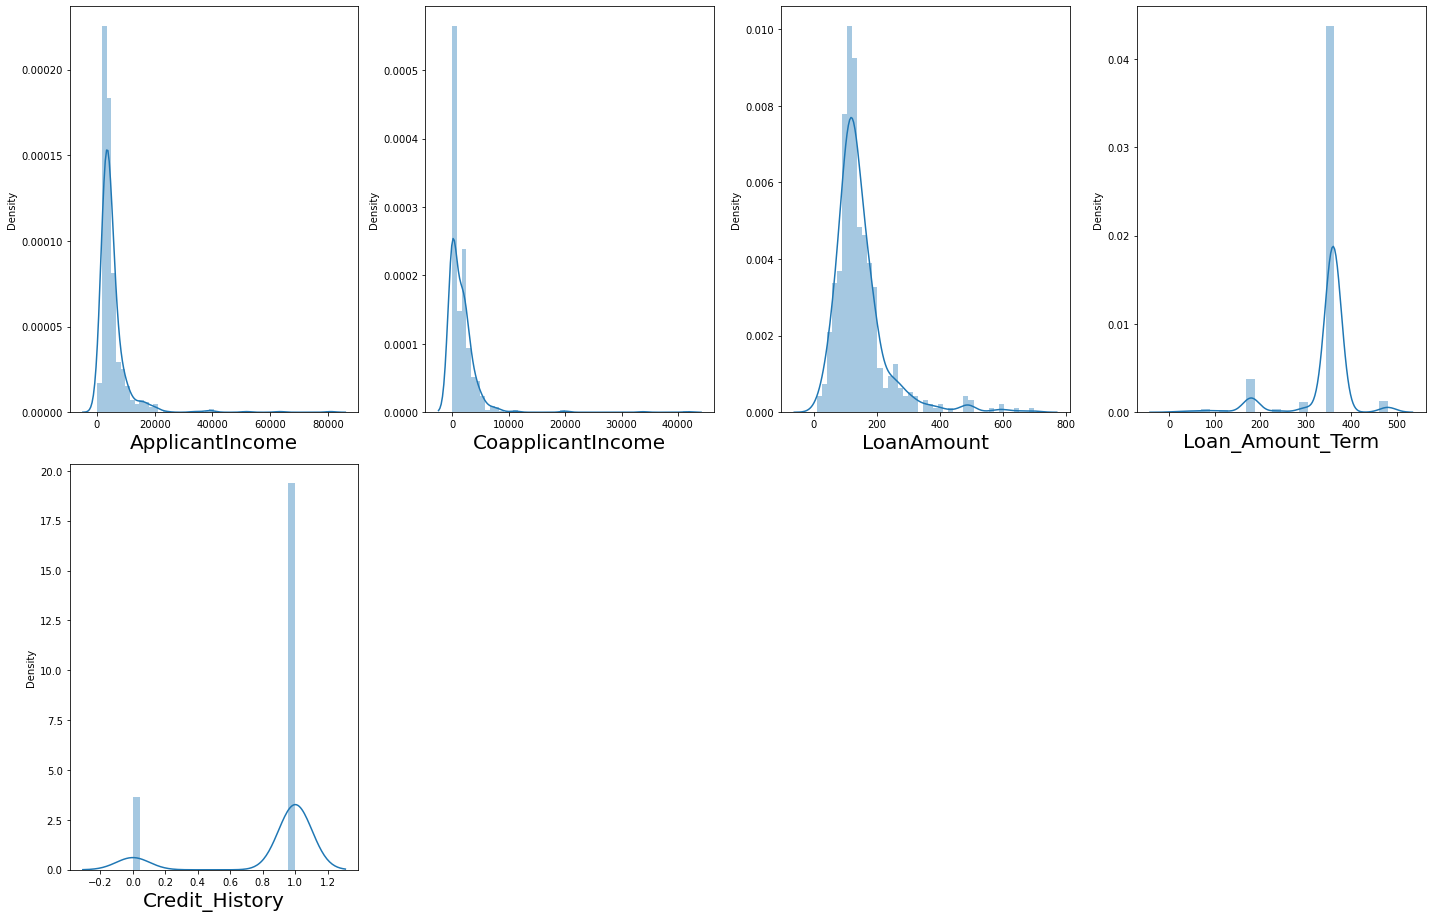

In [42]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df_visualization_continueous:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df_visualization_continueous[column])
        plt.xlabel(column,fontsize=20)
       
    
    plotnumber+=1
plt.tight_layout() 

In [ ]:
# Left Skew
"ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"

In [43]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [44]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [45]:
from sklearn.preprocessing import OneHotEncoder,power_transform,StandardScaler,OrdinalEncoder
enc=OrdinalEncoder()

In [50]:
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [51]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


In [53]:
#Encoder and Imputer
# we shoud put the column in order before applying OHE or Label Encoder

from sklearn.preprocessing import LabelEncoder


In [54]:
lab_enc=LabelEncoder()

In [55]:
df2=lab_enc.fit_transform(df['Loan_Amount_Term'])
pd.Series(df2)

0      8
1      8
2      8
3      8
4      8
      ..
609    8
610    5
611    8
612    8
613    8
Length: 614, dtype: int64

In [57]:
df['Loan_Amount_Term']=df2
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Embarked
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,8,1.0,2.0,1.0,8
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,8,1.0,0.0,0.0,8
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,8,1.0,2.0,1.0,8
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,8,1.0,2.0,1.0,8
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,8,1.0,2.0,1.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,8,1.0,0.0,1.0,8
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,5,1.0,0.0,1.0,5
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,8,1.0,2.0,1.0,8
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,8,1.0,2.0,1.0,8


In [59]:
df=df.drop(columns=['Embarked'],axis=1)

In [60]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,7.667752,0.855049,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,1.109224,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,8.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,8.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,8.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,9.000000,1.000000,2.000000,1.000000


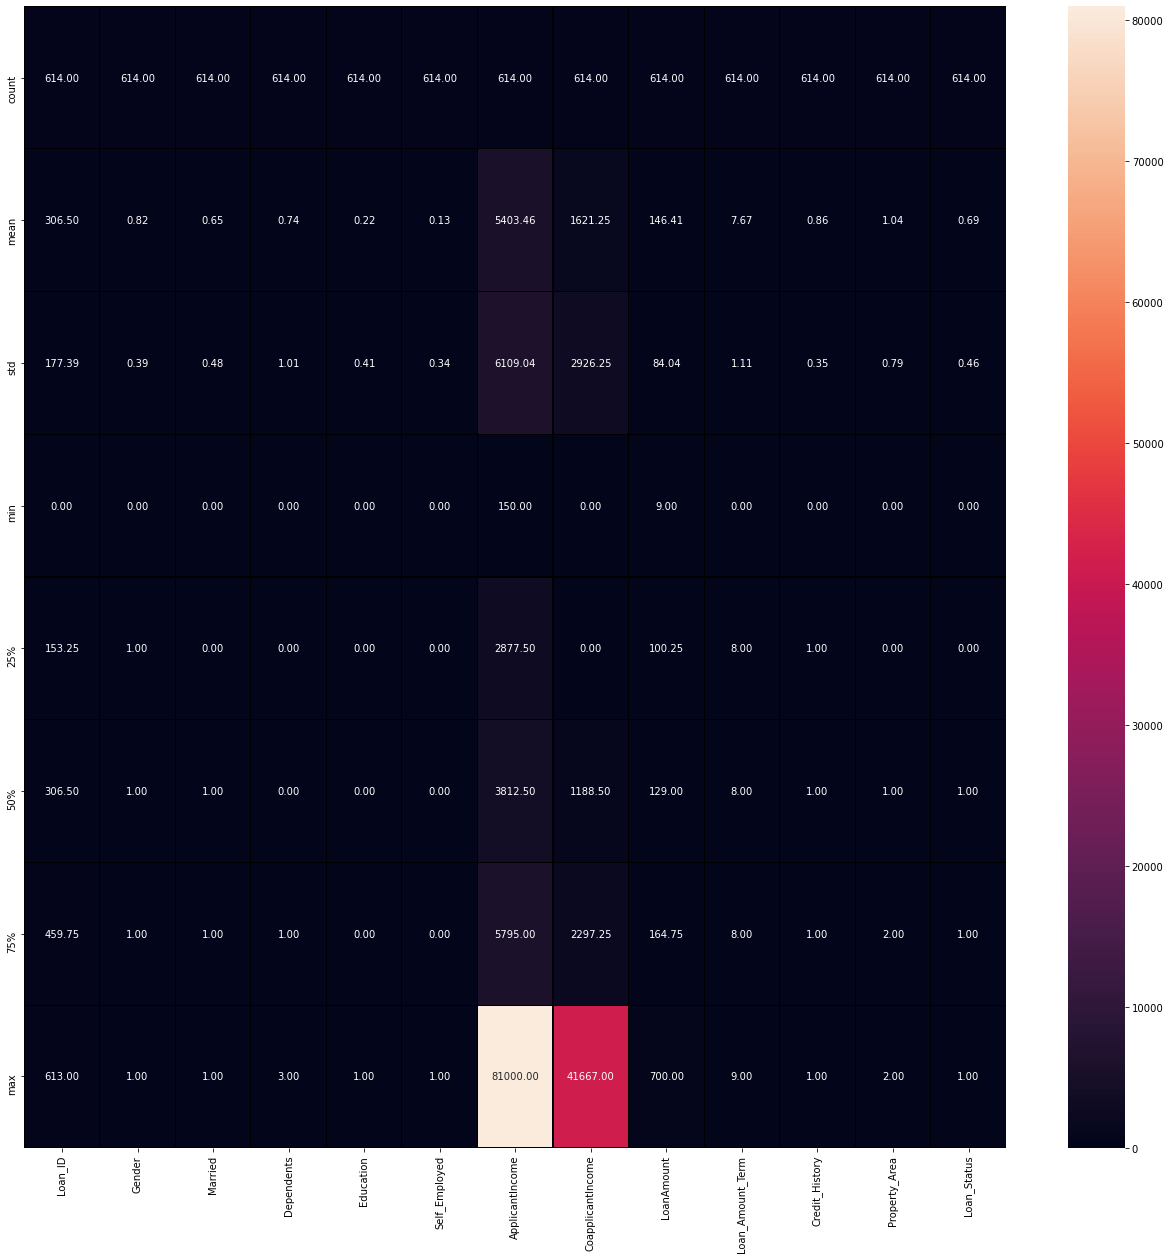

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize= [22,21])
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

#plt.title("Correlation Matrix")
plt.show()

In [62]:
# Multivariate Analysis
# checking correlation

corr_mat=df.corr() 
corr_mat

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.035684,-0.036504,-0.030603,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.065494,0.009170,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.082642,0.010938,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.096377,-0.040160,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.076414,-0.073658,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.029184,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.038808,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.052472,0.011134,0.010522,-0.059187
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.037500,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.036504,-0.065494,-0.082642,-0.096377,-0.076414,-0.029184,-0.038808,-0.052472,0.037500,1.000000,-0.002379,-0.086578,-0.005679


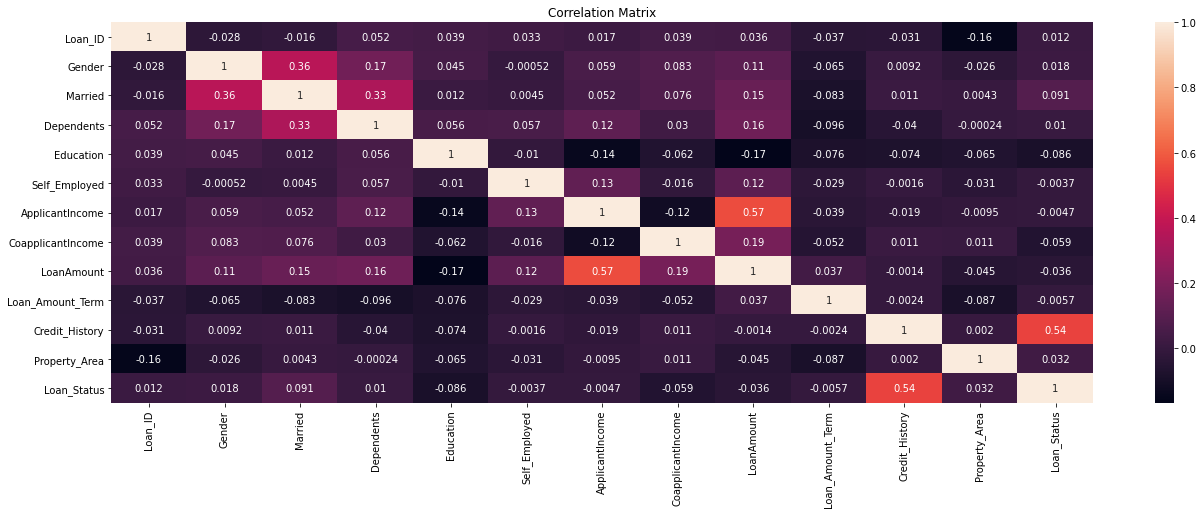

In [63]:
# It is difficut to analyse each feature co-relation in tabular form,lets convert into heat map plot
import matplotlib.pyplot as plt
plt.figure(figsize= [22,7])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# No strong co relation between feature

In [64]:
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -3.316702
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [ ]:
#Dropping Categorical variable and treating outlier for continueous features

In [65]:
#Creating two dataset for transformation
x1=df[['ApplicantIncome','CoapplicantIncome','LoanAmount']]
x1.head()
x2=df.drop(columns=['ApplicantIncome','CoapplicantIncome','LoanAmount'],axis=1)
x2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,8,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,8,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,8,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,8,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,8,1.0,2.0,1.0


In [66]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x1)
df_new=pd.DataFrame(df_new,columns=x1.columns)

In [67]:
df_new.skew()

ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.024376
dtype: float64

In [ ]:
#Now skewness is zero after power transformation

In [68]:
result = pd.concat([df_new, x2], axis=1)
result.shape

(614, 13)

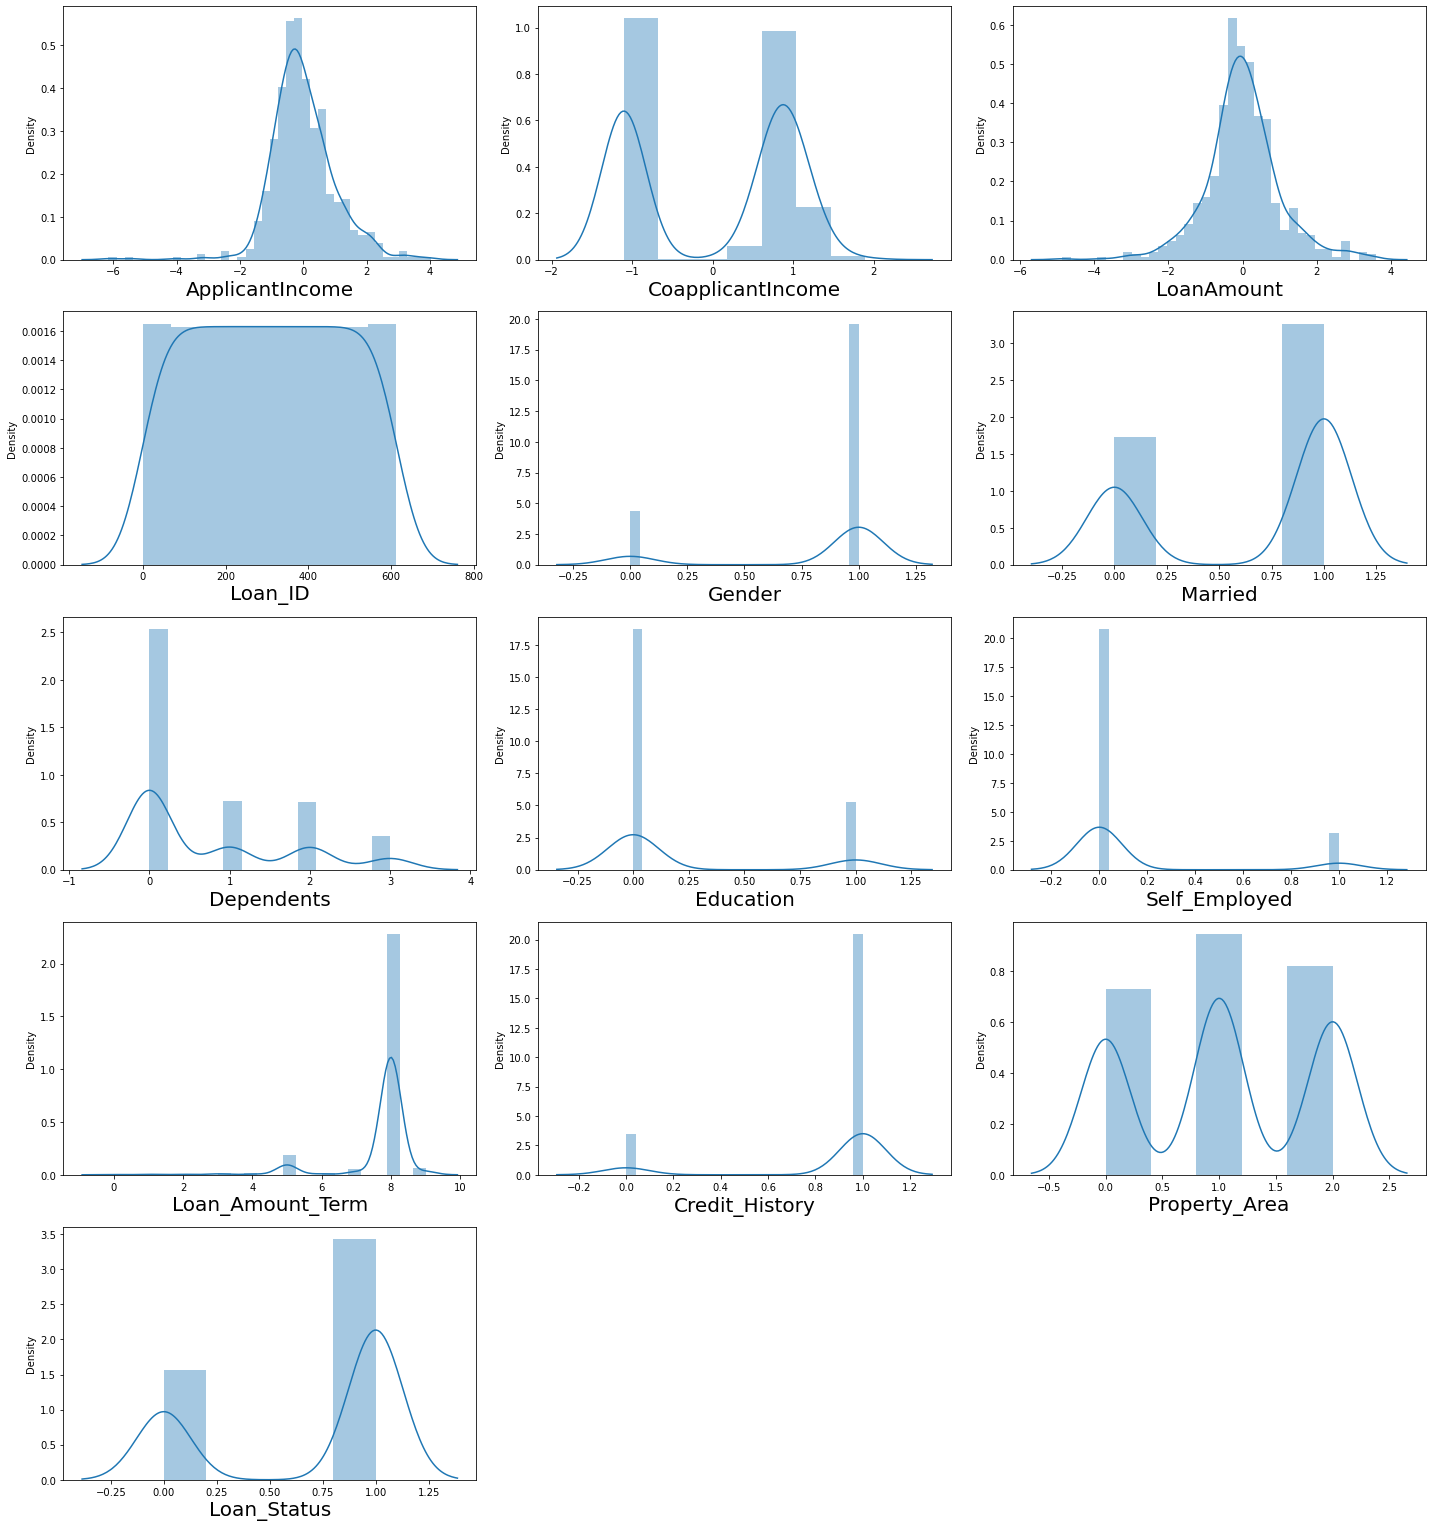

In [69]:
# Lets check distribution after transformation,
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in result:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(result[column])
        plt.xlabel(column,fontsize=20)
       
    
    plotnumber+=1
plt.tight_layout()  

In [ ]:
# Boxplot outlier tretment
#Lets check the skewness with  boxplot 

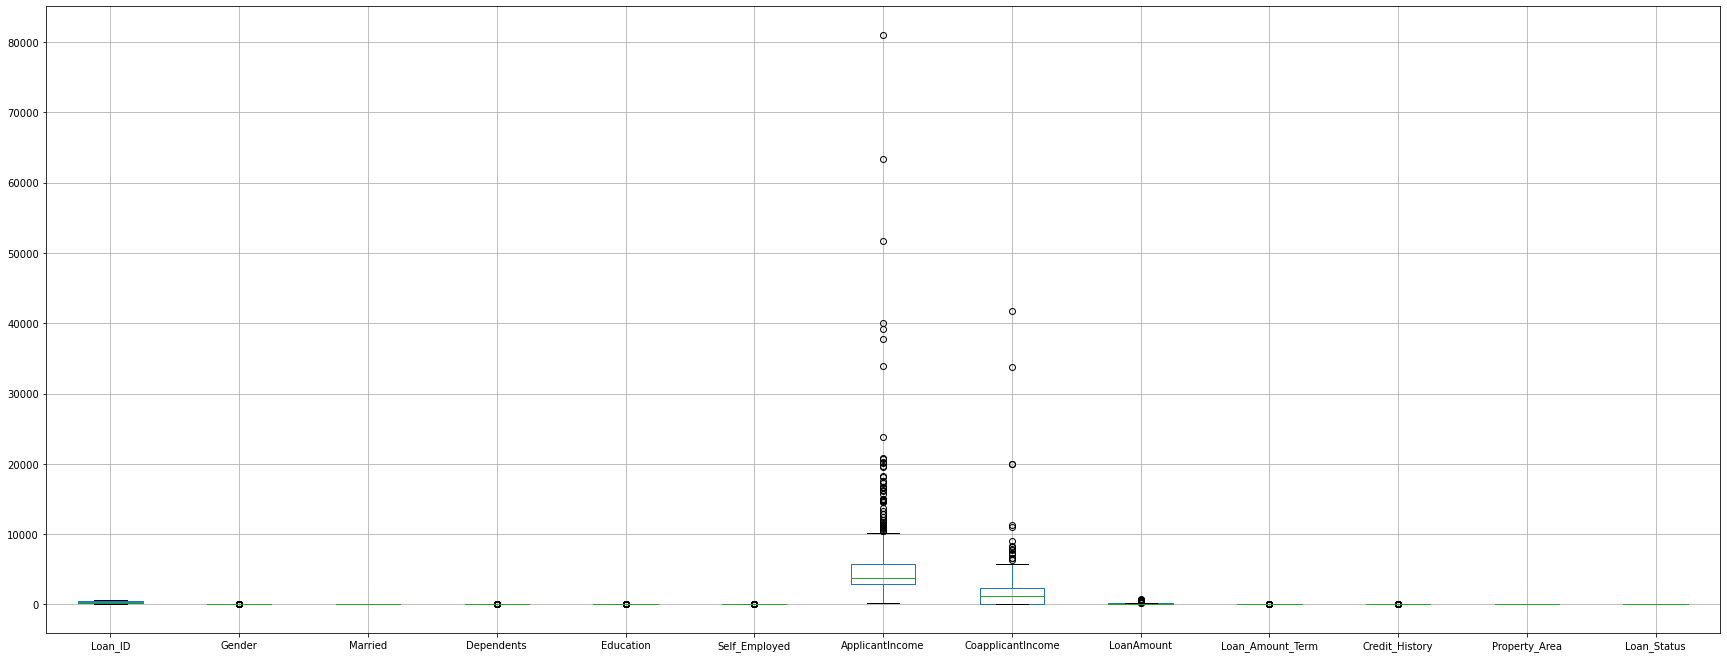

In [71]:
df.boxplot(figsize=[30,10],)
plt.subplots_adjust(bottom=.01)
plt.show()

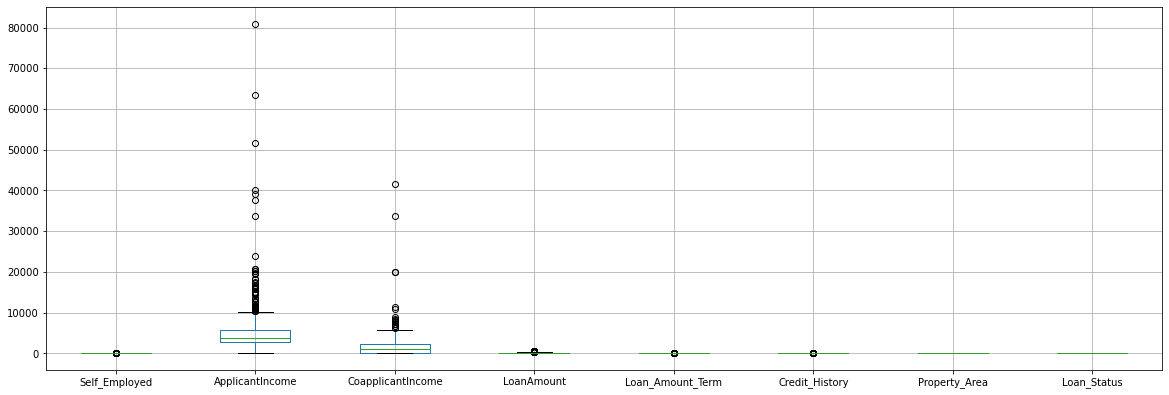

In [72]:
df.iloc[:,5:20].boxplot(figsize=[20,8],)
plt.subplots_adjust(bottom=.25)
plt.show()

In [ ]:
# In box plot,ApplicantIncome,CoapplicantIncome,LoanAmount are on higher side


In [77]:
# 1st quantile

q1=result.quantile(0.25)

#3rd quantile

q3=result.quantile(0.75)

# IQR

iqr=q3-q1

In [78]:
index=np.where(result['ApplicantIncome']>(q3.ApplicantIncome+(1.5*iqr.ApplicantIncome)))
result=result.drop(result.index[index])
result.reset_index()

,index,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0.544331,-1.102837,0.235387,0.0,1.0,0.0,0.0,0.0,0.0,8,1.0,2.0,1.0
1,1,0.170974,0.750578,-0.037659,1.0,1.0,1.0,1.0,0.0,0.0,8,1.0,0.0,0.0
2,2,-0.499955,-1.102837,-1.346305,2.0,1.0,1.0,0.0,0.0,1.0,8,1.0,2.0,1.0
3,3,-0.743873,0.891686,-0.167886,3.0,1.0,1.0,0.0,1.0,0.0,8,1.0,2.0,1.0
4,4,0.582817,-1.102837,0.158610,4.0,1.0,0.0,0.0,0.0,0.0,8,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,609,-0.554885,-1.102837,-1.205100,609.0,0.0,0.0,0.0,0.0,0.0,8,1.0,0.0,1.0
596,610,-0.000290,-1.102837,-2.293317,610.0,1.0,1.0,3.0,0.0,0.0,5,1.0,0.0,1.0
597,611,1.023487,0.208603,1.372409,611.0,1.0,1.0,1.0,0.0,0.0,8,1.0,2.0,1.0
598,612,0.931750,-1.102837,0.738924,612.0,1.0,1.0,2.0,0.0,0.0,8,1.0,2.0,1.0


In [79]:
index=np.where(result['CoapplicantIncome']>(q3.CoapplicantIncome+(1.5*iqr.CoapplicantIncome)))
result=result.drop(result.index[index])
result.reset_index()

,index,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0.544331,-1.102837,0.235387,0.0,1.0,0.0,0.0,0.0,0.0,8,1.0,2.0,1.0
1,1,0.170974,0.750578,-0.037659,1.0,1.0,1.0,1.0,0.0,0.0,8,1.0,0.0,0.0
2,2,-0.499955,-1.102837,-1.346305,2.0,1.0,1.0,0.0,0.0,1.0,8,1.0,2.0,1.0
3,3,-0.743873,0.891686,-0.167886,3.0,1.0,1.0,0.0,1.0,0.0,8,1.0,2.0,1.0
4,4,0.582817,-1.102837,0.158610,4.0,1.0,0.0,0.0,0.0,0.0,8,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,609,-0.554885,-1.102837,-1.205100,609.0,0.0,0.0,0.0,0.0,0.0,8,1.0,0.0,1.0
596,610,-0.000290,-1.102837,-2.293317,610.0,1.0,1.0,3.0,0.0,0.0,5,1.0,0.0,1.0
597,611,1.023487,0.208603,1.372409,611.0,1.0,1.0,1.0,0.0,0.0,8,1.0,2.0,1.0
598,612,0.931750,-1.102837,0.738924,612.0,1.0,1.0,2.0,0.0,0.0,8,1.0,2.0,1.0


In [80]:
index=np.where(result['LoanAmount']>(q3.LoanAmount+(1.5*iqr.LoanAmount)))
result=result.drop(result.index[index])
result.reset_index()

,index,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0.544331,-1.102837,0.235387,0.0,1.0,0.0,0.0,0.0,0.0,8,1.0,2.0,1.0
1,1,0.170974,0.750578,-0.037659,1.0,1.0,1.0,1.0,0.0,0.0,8,1.0,0.0,0.0
2,2,-0.499955,-1.102837,-1.346305,2.0,1.0,1.0,0.0,0.0,1.0,8,1.0,2.0,1.0
3,3,-0.743873,0.891686,-0.167886,3.0,1.0,1.0,0.0,1.0,0.0,8,1.0,2.0,1.0
4,4,0.582817,-1.102837,0.158610,4.0,1.0,0.0,0.0,0.0,0.0,8,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,609,-0.554885,-1.102837,-1.205100,609.0,0.0,0.0,0.0,0.0,0.0,8,1.0,0.0,1.0
585,610,-0.000290,-1.102837,-2.293317,610.0,1.0,1.0,3.0,0.0,0.0,5,1.0,0.0,1.0
586,611,1.023487,0.208603,1.372409,611.0,1.0,1.0,1.0,0.0,0.0,8,1.0,2.0,1.0
587,612,0.931750,-1.102837,0.738924,612.0,1.0,1.0,2.0,0.0,0.0,8,1.0,2.0,1.0


In [85]:
#Splitting the dataset
x_over=result.drop(columns=['Loan_Status'])
y_over=result['Loan_Status']

In [86]:
# Model Development

In [87]:
# Finding best random state

In [88]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test =train_test_split(x_over,y_over,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

Best accuracy is 0.8926553672316384 on Random_state 243


In [ ]:
#Best accuracy is 0.8926553672316384 on Random_state 243

In [ ]:
#Creating Train test split

In [89]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8248587570621468
[[ 21  27]
 [  4 125]]
              precision    recall  f1-score   support

         0.0       0.84      0.44      0.58        48
         1.0       0.82      0.97      0.89       129

    accuracy                           0.82       177
   macro avg       0.83      0.70      0.73       177
weighted avg       0.83      0.82      0.80       177



In [90]:
import xgboost as xgb
xgb=xgb.XGBClassifier()
xgb.fit(x_train,y_train)
predxgb=xgb.predict(x_test)
print(accuracy_score(y_test,predxgb))
print(confusion_matrix(y_test,predxgb))
print(classification_report(y_test,predxgb))

[10:47:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8248587570621468
[[ 31  17]
 [ 14 115]]
              precision    recall  f1-score   support

         0.0       0.69      0.65      0.67        48
         1.0       0.87      0.89      0.88       129

    accuracy                           0.82       177
   macro avg       0.78      0.77      0.77       177
weighted avg       0.82      0.82      0.82       177



In [91]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8305084745762712
[[ 23  25]
 [  5 124]]
              precision    recall  f1-score   support

         0.0       0.82      0.48      0.61        48
         1.0       0.83      0.96      0.89       129

    accuracy                           0.83       177
   macro avg       0.83      0.72      0.75       177
weighted avg       0.83      0.83      0.81       177



In [92]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.7627118644067796
[[ 28  20]
 [ 22 107]]
              precision    recall  f1-score   support

         0.0       0.56      0.58      0.57        48
         1.0       0.84      0.83      0.84       129

    accuracy                           0.76       177
   macro avg       0.70      0.71      0.70       177
weighted avg       0.77      0.76      0.76       177



In [93]:
from sklearn.ensemble import AdaBoostClassifier
Ada=AdaBoostClassifier()
Ada.fit(x_train,y_train)
predAda=Ada.predict(x_test)
print(accuracy_score(y_test,predAda))
print(confusion_matrix(y_test,predAda))
print(classification_report(y_test,predAda))

0.7853107344632768
[[ 20  28]
 [ 10 119]]
              precision    recall  f1-score   support

         0.0       0.67      0.42      0.51        48
         1.0       0.81      0.92      0.86       129

    accuracy                           0.79       177
   macro avg       0.74      0.67      0.69       177
weighted avg       0.77      0.79      0.77       177



In [ ]:
# cheking overfitting problem

In [94]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR,x_over,y_over,cv=5)
print("Cross Validation Score fo Logistic Regression :",scr.mean())

Cross Validation Score fo Logistic Regression : 0.8149500217296828


In [95]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(xgb,x_over,y_over,cv=5)
print("Cross Validation Score fo XGB :",scr.mean())

[10:53:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:53:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:53:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:53:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [96]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf,x_over,y_over,cv=5)
print("Cross Validation Score fo RandomForest :",scr.mean())

Cross Validation Score fo RandomForest : 0.7775170215848182


In [97]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt,x_over,y_over,cv=5)
print("Cross Validation Score fo Decesion Tree :",scr.mean())

Cross Validation Score fo Decesion Tree : 0.6906417499637839


In [98]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(Ada,x_over,y_over,cv=5)
print("Cross Validation Score fo Adaboost :",scr.mean())

Cross Validation Score fo Adaboost : 0.5903520208604954


In [ ]:
      Model Accuracy      Cross Validation Score      Diff
LR     82                         81                  1
DT     76                         75                  1
RF     83                         77                  6
Ada    79                         69                  10
Xgb    82                         59                  23

Since diff is 1 with high model accuracy for LR,It is the best model 

In [ ]:
#Hyper parameter tuning

In [99]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv.fit(x_train,y_train)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 31.622776601683793}
Best score is 0.8131060828680576


In [ ]:
import pickle

# writing diffrent model files to file

with open('modelForPrediction.sav','LR') as f:
    pickle.dump(rf,f)
    
with open ('SandardScalar.sav','LR') as f:
    pickle.dump(scalar,f)